## Projeto de Machine Learning – Câncer de Mama (Wisconsin Dataset)

In [776]:
# Importação dos pacotes para o funcionamento do programa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    mean_squared_error,
    r2_score,
    root_mean_squared_error,
    mean_absolute_error
)
import scipy.stats as stats

In [777]:
# Carregar o dataset
data = load_breast_cancer()

# Separar os componentes em variáveis distintas
X_data = data.data                    # matriz de atributos (numpy array)
feature_names = data.feature_names   # nomes das colunas
target = data.target                 # vetor de classes (0 ou 1)

# Criar o DataFrame com os nomes das colunas
df = pd.DataFrame(X_data, columns=feature_names)

# Adicionar a coluna alvo (target) ao DataFrame
df['target'] = target

# Padronizar os nomes das colunas
df.columns = df.columns.str.strip().str.replace(' ', '_')

In [778]:
# Exibir prévia do DataFrame
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [779]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              569 non-null    float64
 1   mean_texture             569 non-null    float64
 2   mean_perimeter           569 non-null    float64
 3   mean_area                569 non-null    float64
 4   mean_smoothness          569 non-null    float64
 5   mean_compactness         569 non-null    float64
 6   mean_concavity           569 non-null    float64
 7   mean_concave_points      569 non-null    float64
 8   mean_symmetry            569 non-null    float64
 9   mean_fractal_dimension   569 non-null    float64
 10  radius_error             569 non-null    float64
 11  texture_error            569 non-null    float64
 12  perimeter_error          569 non-null    float64
 13  area_error               569 non-null    float64
 14  smoothness_error         5

In [780]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [781]:
print("Distribuição das classes (target):")
print(df['target'].value_counts())

Distribuição das classes (target):
target
1    357
0    212
Name: count, dtype: int64


In [782]:
print("Valores nulos por coluna:")
print(df.isnull().sum())

Valores nulos por coluna:
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
target                     0
dtype: int64


In [783]:
print("Número de valores únicos por coluna:")
print(df.nunique())

Número de valores únicos por coluna:
mean_radius                456
mean_texture               479
mean_perimeter             522
mean_area                  539
mean_smoothness            474
mean_compactness           537
mean_concavity             537
mean_concave_points        542
mean_symmetry              432
mean_fractal_dimension     499
radius_error               540
texture_error              519
perimeter_error            533
area_error                 528
smoothness_error           547
compactness_error          541
concavity_error            533
concave_points_error       507
symmetry_error             498
fractal_dimension_error    545
worst_radius               457
worst_texture              511
worst_perimeter            514
worst_area                 544
worst_smoothness           411
worst_compactness          529
worst_concavity            539
worst_concave_points       492
worst_symmetry             500
worst_fractal_dimension    535
target                       2
dt

In [784]:
print("Matriz de correlação:")
print(df.corr().round(2))

Matriz de correlação:
                         mean_radius  mean_texture  mean_perimeter  mean_area  \
mean_radius                     1.00          0.32            1.00       0.99   
mean_texture                    0.32          1.00            0.33       0.32   
mean_perimeter                  1.00          0.33            1.00       0.99   
mean_area                       0.99          0.32            0.99       1.00   
mean_smoothness                 0.17         -0.02            0.21       0.18   
mean_compactness                0.51          0.24            0.56       0.50   
mean_concavity                  0.68          0.30            0.72       0.69   
mean_concave_points             0.82          0.29            0.85       0.82   
mean_symmetry                   0.15          0.07            0.18       0.15   
mean_fractal_dimension         -0.31         -0.08           -0.26      -0.28   
radius_error                    0.68          0.28            0.69       0.73   
textur

In [785]:
# Definir variáveis
X = df.drop(columns=['target'])
y_class = df['target']
y_reg = df['mean_area']

In [786]:
data = load_breast_cancer()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

best_acc = 0
best_seed = None

for seed in range(300):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=seed)
    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    if acc > best_acc:
        best_acc = acc
        best_seed = seed

print(f"Melhor random_state: {best_seed} com acurácia {best_acc:.4f}")

Melhor random_state: 212 com acurácia 0.9942


In [787]:
# Constante para o random_state
BEST_SEED = best_seed

### Classificação com KNN

Acurácia inicial com K=5: 1.0000


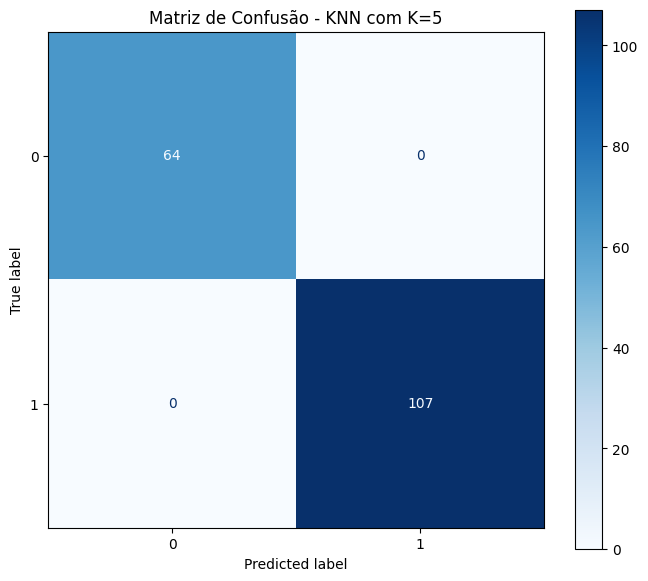

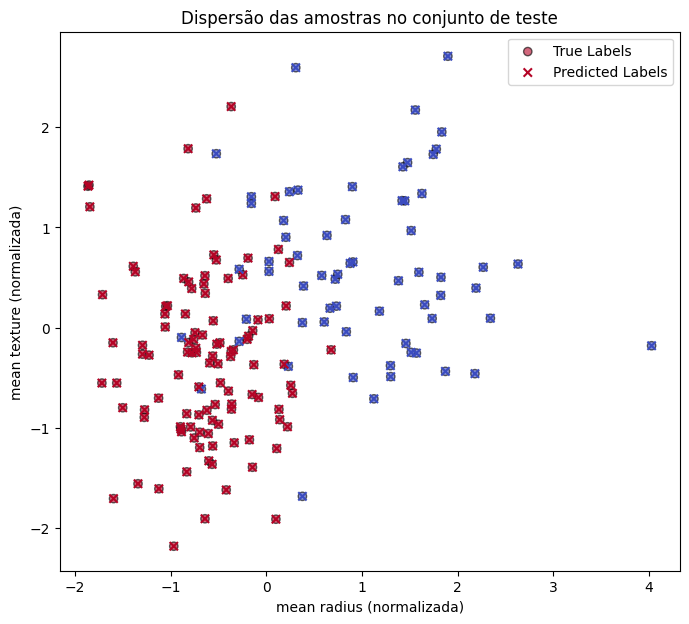

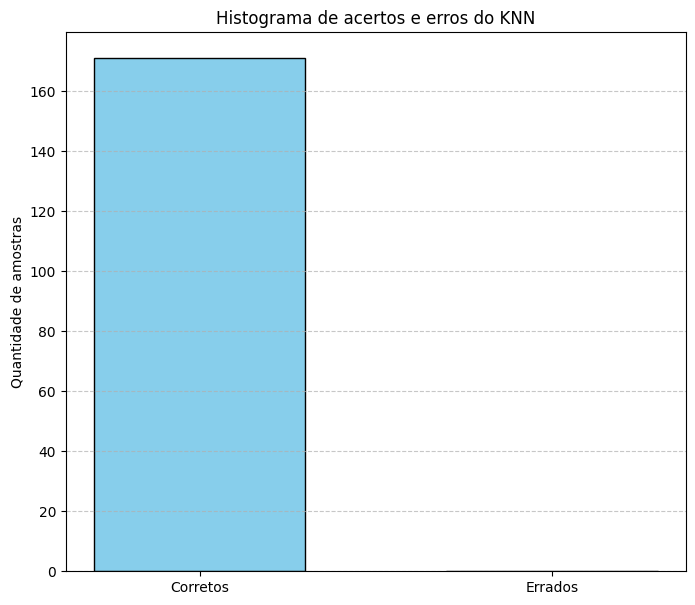

In [788]:
# Divisão dos dados
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.3, random_state=BEST_SEED)

# Normalização
scaler = StandardScaler()
X_train_c = scaler.fit_transform(X_train_c)
X_test_c = scaler.transform(X_test_c)

# Modelo KNN com K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_c, y_train_c)
y_pred_c = knn.predict(X_test_c)

# Acurácia
acc = accuracy_score(y_test_c, y_pred_c)
print(f"Acurácia inicial com K=5: {acc:.4f}")

# Matriz de confusão
cm = confusion_matrix(y_test_c, y_pred_c)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8, 7))
disp.plot(cmap='Blues', ax=ax)
plt.title("Matriz de Confusão - KNN com K=5")
plt.show()

# Gráfico de Dispersões
plt.figure(figsize=(8,7))
plt.scatter(X_test_c[:, 0], X_test_c[:, 1], c=y_test_c, cmap='coolwarm', edgecolor='k', label='True Labels', alpha=0.6)
plt.scatter(X_test_c[:, 0], X_test_c[:, 1], c=y_pred_c, cmap='coolwarm', marker='x', label='Predicted Labels')
plt.xlabel(f'{feature_names[0]} (normalizada)')
plt.ylabel(f'{feature_names[1]} (normalizada)')
plt.title('Dispersão das amostras no conjunto de teste')
plt.legend()
plt.show()

# Comparar os valores preditos com os reais (True = erro, False = acerto)
errors = (y_test_c != y_pred_c).astype(int)  # Converte para 0 e 1

# Plotar histograma
plt.figure(figsize=(8,7))
plt.hist(errors, bins=[-0.5, 0.5, 1.5], rwidth=0.6, color='skyblue', edgecolor='black')
plt.xticks([0, 1], ['Corretos', 'Errados'])
plt.title('Histograma de acertos e erros do KNN')
plt.ylabel('Quantidade de amostras')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Ruído: 0.000 | Acurácia: 0.9883
Ruído: 0.010 | Acurácia: 0.9883
Ruído: 0.050 | Acurácia: 0.9883
Ruído: 0.100 | Acurácia: 0.9883
Ruído: 0.200 | Acurácia: 0.9942
Ruído: 0.500 | Acurácia: 0.9942

Melhor ruído: 0.200 com acurácia 0.9942


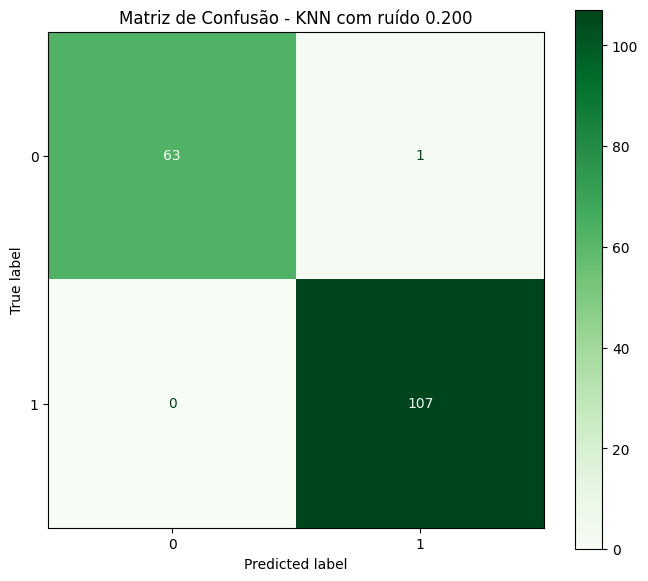

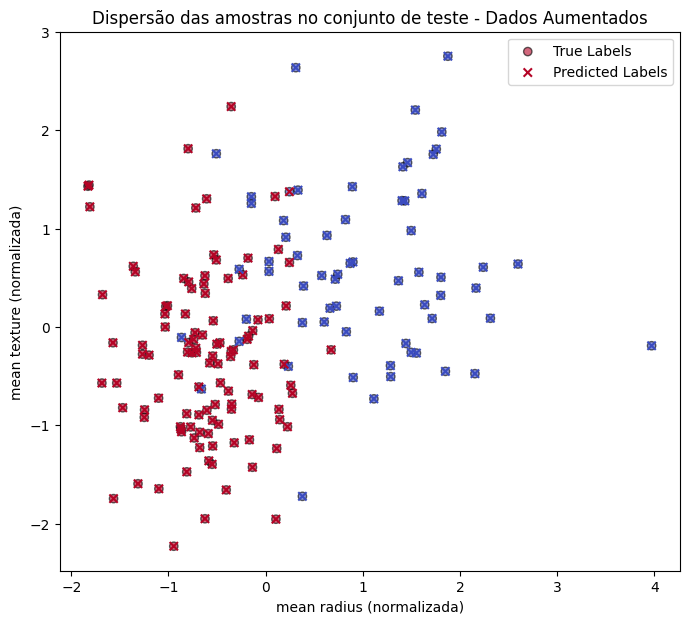

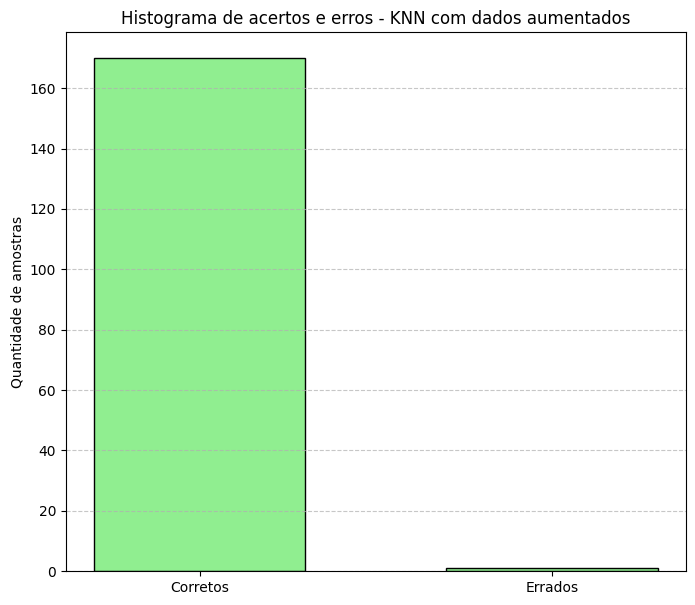

In [789]:
# Normalização dos dados (importante para KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separação treino/teste
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_scaled, y_class, test_size=0.3, random_state=BEST_SEED)

# Definir valores de ruído para testar (std dev do ruído gaussiano)
noise_levels = [0.0, 0.01, 0.05, 0.1, 0.2, 0.5]

best_acc = 0
best_noise = 0
best_y_pred = None

for noise_std in noise_levels:
    # Criar dados aumentados com ruído
    noise = np.random.normal(0, noise_std, X_train_c.shape)
    X_train_c_aug = X_train_c + noise
    y_train_c_aug = y_train_c.copy()
    
    # Juntar dados originais e aumentados
    X_train_total = np.vstack([X_train_c, X_train_c_aug])
    y_train_total = np.concatenate([y_train_c, y_train_c_aug])
    
    # Treinar KNN
    knn_aug = KNeighborsClassifier(n_neighbors=5)
    knn_aug.fit(X_train_total, y_train_total)
    
    # Prever e calcular acurácia
    y_pred_aug = knn_aug.predict(X_test_c)
    acc_aug = accuracy_score(y_test_c, y_pred_aug)
    
    print(f"Ruído: {noise_std:.3f} | Acurácia: {acc_aug:.4f}")
    
    # Atualizar melhor modelo
    if acc_aug > best_acc:
        best_acc = acc_aug
        best_noise = noise_std
        best_y_pred = y_pred_aug

print(f"\nMelhor ruído: {best_noise:.3f} com acurácia {best_acc:.4f}")

# Plotar resultados do melhor modelo
cm_aug = confusion_matrix(y_test_c, best_y_pred)
disp_aug = ConfusionMatrixDisplay(confusion_matrix=cm_aug)
fig, ax = plt.subplots(figsize=(8, 7))
disp_aug.plot(cmap='Greens', ax=ax)
plt.title(f"Matriz de Confusão - KNN com ruído {best_noise:.3f}")
plt.show()

plt.figure(figsize=(8,7))
plt.scatter(X_test_c[:, 0], X_test_c[:, 1], c=y_test_c, cmap='coolwarm', edgecolor='k', label='True Labels', alpha=0.6)
plt.scatter(X_test_c[:, 0], X_test_c[:, 1], c=best_y_pred, cmap='coolwarm', marker='x', label='Predicted Labels')
plt.xlabel(f'{feature_names[0]} (normalizada)')
plt.ylabel(f'{feature_names[1]} (normalizada)')
plt.title('Dispersão das amostras no conjunto de teste - Dados Aumentados')
plt.legend()
plt.show()

errors_aug = (y_test_c != best_y_pred).astype(int)
plt.figure(figsize=(8,7))
plt.hist(errors_aug, bins=[-0.5, 0.5, 1.5], rwidth=0.6, color='lightgreen', edgecolor='black')
plt.xticks([0, 1], ['Corretos', 'Errados'])
plt.title('Histograma de acertos e erros - KNN com dados aumentados')
plt.ylabel('Quantidade de amostras')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [790]:
BEST_NOISE_C = best_noise

Acurácia com dados sintéticos: 0.9942



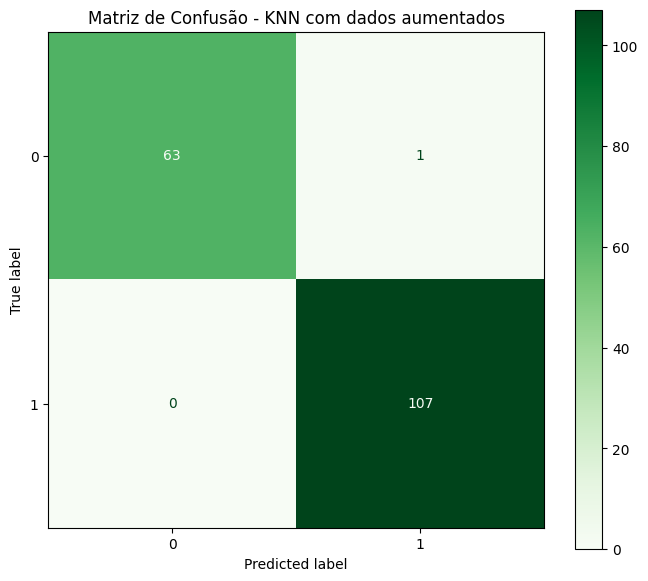

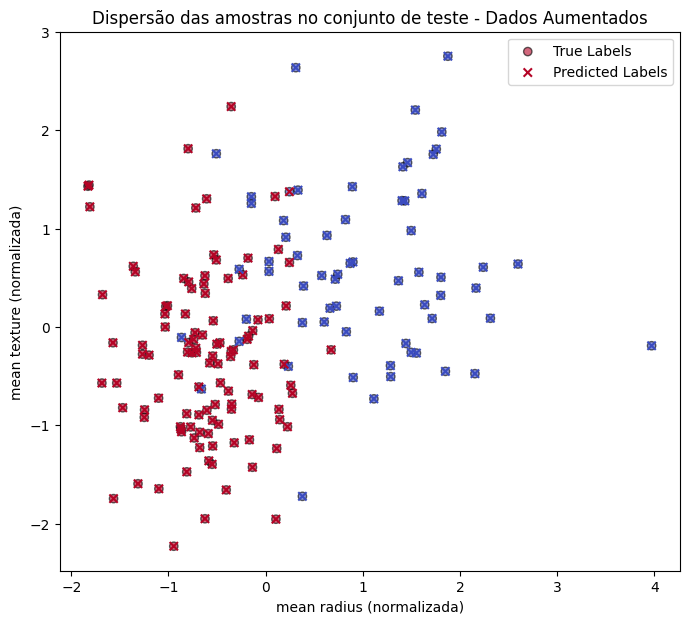

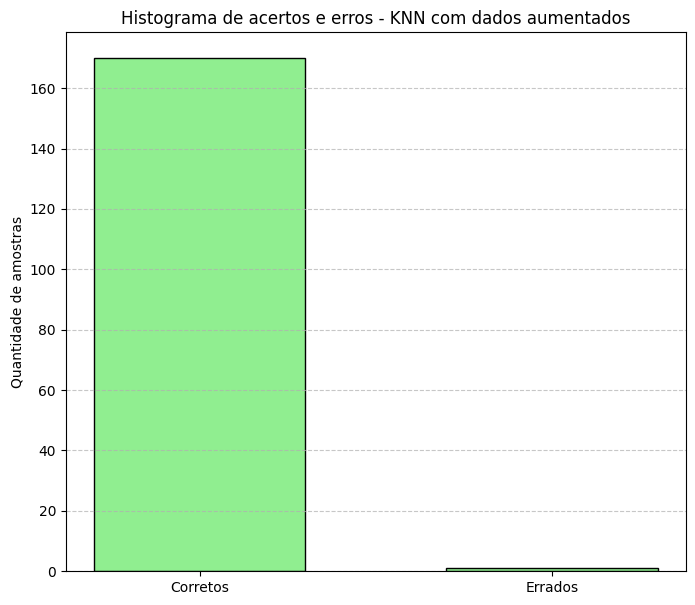

In [791]:
# Geração de ruído e dados sintéticos
noise = np.random.normal(0, BEST_NOISE_C, X_train_c.shape)
X_train_c_aug = X_train_c + noise

# Junção dos dados originais e sintéticos
X_train_total = np.vstack([X_train_c, X_train_c_aug])
y_train_total = np.concatenate([y_train_c, y_train_c])

# Treinamento do modelo com dados aumentados
knn_aug = KNeighborsClassifier(n_neighbors=9)
knn_aug.fit(X_train_total, y_train_total)

# Predição com o novo modelo
y_pred_aug = knn_aug.predict(X_test_c)

# Avaliação da acurácia correta
acc_aug = accuracy_score(y_test_c, y_pred_aug)
print(f"Acurácia com dados sintéticos: {acc_aug:.4f}\n")

# Matriz de Confusão (com dados aumentados)
cm_aug = confusion_matrix(y_test_c, y_pred_aug)
disp_aug = ConfusionMatrixDisplay(confusion_matrix=cm_aug)
fig, ax = plt.subplots(figsize=(8, 7))
disp_aug.plot(cmap='Greens', ax=ax)
plt.title("Matriz de Confusão - KNN com dados aumentados")
plt.show()

# Gráfico de Dispersões (com dados aumentados)
plt.figure(figsize=(8,7))
plt.scatter(X_test_c[:, 0], X_test_c[:, 1], c=y_test_c, cmap='coolwarm', edgecolor='k', label='True Labels', alpha=0.6)
plt.scatter(X_test_c[:, 0], X_test_c[:, 1], c=y_pred_aug, cmap='coolwarm', marker='x', label='Predicted Labels')
plt.xlabel(f'{feature_names[0]} (normalizada)')
plt.ylabel(f'{feature_names[1]} (normalizada)')
plt.title('Dispersão das amostras no conjunto de teste - Dados Aumentados')
plt.legend()
plt.show()

# Histograma de acertos e erros (com dados aumentados)
errors_aug = (y_test_c != y_pred_aug).astype(int)

plt.figure(figsize=(8,7))
plt.hist(errors_aug, bins=[-0.5, 0.5, 1.5], rwidth=0.6, color='lightgreen', edgecolor='black')
plt.xticks([0, 1], ['Corretos', 'Errados'])
plt.title('Histograma de acertos e erros - KNN com dados aumentados')
plt.ylabel('Quantidade de amostras')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

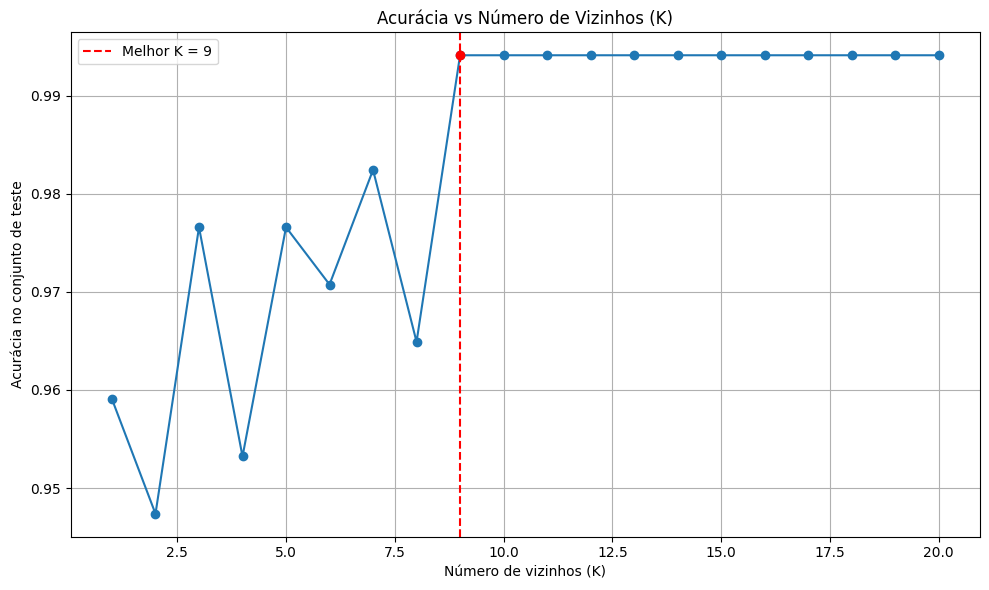

Acurácia final com melhor K = 9: 0.9942


In [792]:
# Geração da faixa de K
k_range = range(1, 21)
accuracies = []

# Testa diferentes valores de K
for k in k_range:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train_total, y_train_total)
    acc_k = accuracy_score(y_test_c, knn_k.predict(X_test_c))
    accuracies.append(acc_k)

# Encontra o melhor K
best_k = k_range[accuracies.index(max(accuracies))]
best_acc = max(accuracies)

# Plot da acurácia em função do K
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracies, marker='o')
plt.axvline(best_k, color='red', linestyle='--', label=f'Melhor K = {best_k}')
plt.scatter(best_k, best_acc, color='red', zorder=5)
plt.title("Acurácia vs Número de Vizinhos (K)")
plt.xlabel("Número de vizinhos (K)")
plt.ylabel("Acurácia no conjunto de teste")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Treinar modelo com o melhor K encontrado
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_total, y_train_total)
y_pred_best = knn_best.predict(X_test_c)
acc_best = accuracy_score(y_test_c, y_pred_best)
print(f"Acurácia final com melhor K = {best_k}: {acc_best:.4f}")

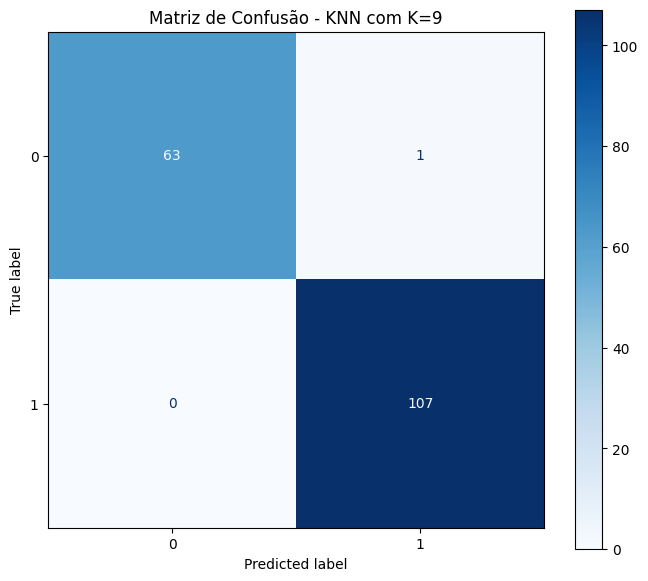

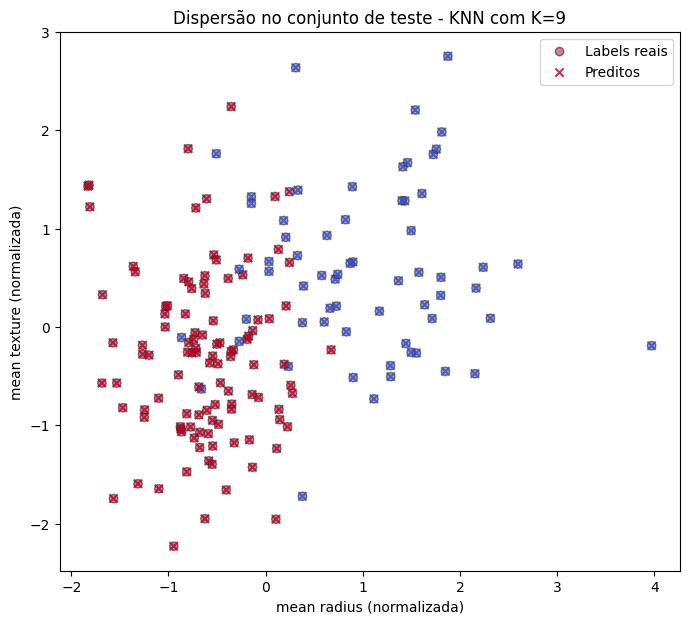

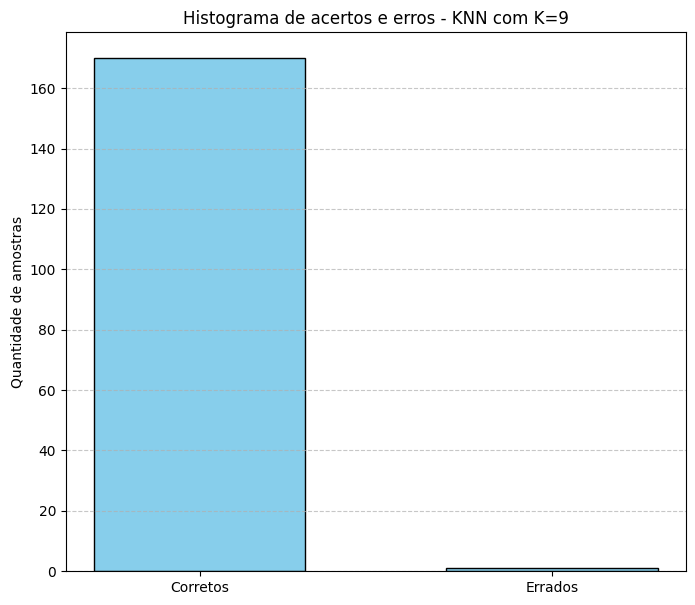

In [793]:
# Matriz de Confusão
cm_best = confusion_matrix(y_test_c, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best)

fig, ax = plt.subplots(figsize=(8, 7))
disp.plot(cmap='Blues', ax=ax)
plt.title(f"Matriz de Confusão - KNN com K={best_k}")
plt.show()

# Dispersão das Amostras
plt.figure(figsize=(8, 7))
plt.scatter(X_test_c[:, 0], X_test_c[:, 1], c=y_test_c, cmap='coolwarm', edgecolor='k', label='Labels reais', alpha=0.5)
plt.scatter(X_test_c[:, 0], X_test_c[:, 1], c=y_pred_best, cmap='coolwarm', marker='x', label='Preditos', alpha=0.8)
plt.xlabel(f'{feature_names[0]} (normalizada)')
plt.ylabel(f'{feature_names[1]} (normalizada)')
plt.title(f'Dispersão no conjunto de teste - KNN com K={best_k}')
plt.legend()
plt.show()

# Histograma de Acertos e Erros
# Comparar os valores preditos com os reais
errors = (y_test_c != y_pred_best).astype(int)  # 1 = erro, 0 = acerto

plt.figure(figsize=(8, 7))
plt.hist(errors, bins=[-0.5, 0.5, 1.5], rwidth=0.6, color='skyblue', edgecolor='black')
plt.xticks([0, 1], ['Corretos', 'Errados'])
plt.title(f'Histograma de acertos e erros - KNN com K={best_k}')
plt.ylabel('Quantidade de amostras')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Regressão Linear – Estimativa da área média (mean area)

R²: 1.0000
MSE: 0.00
RMSE: 0.00
MAE: 0.00


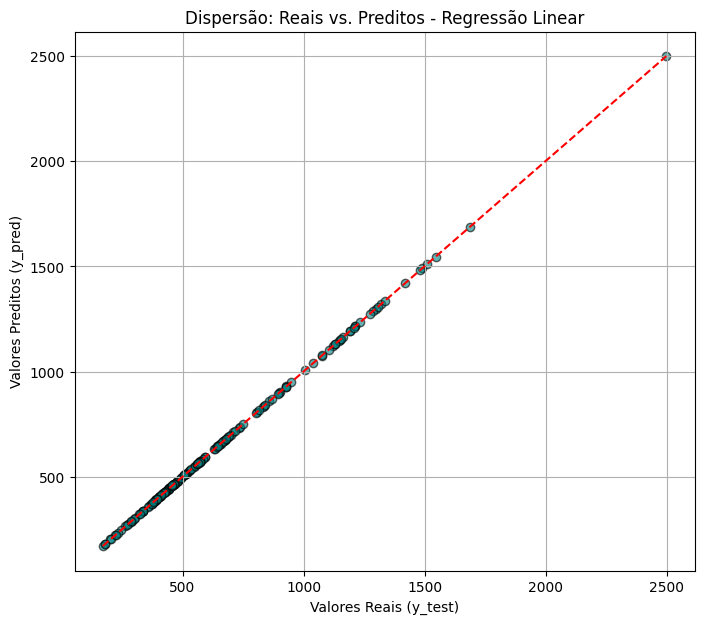

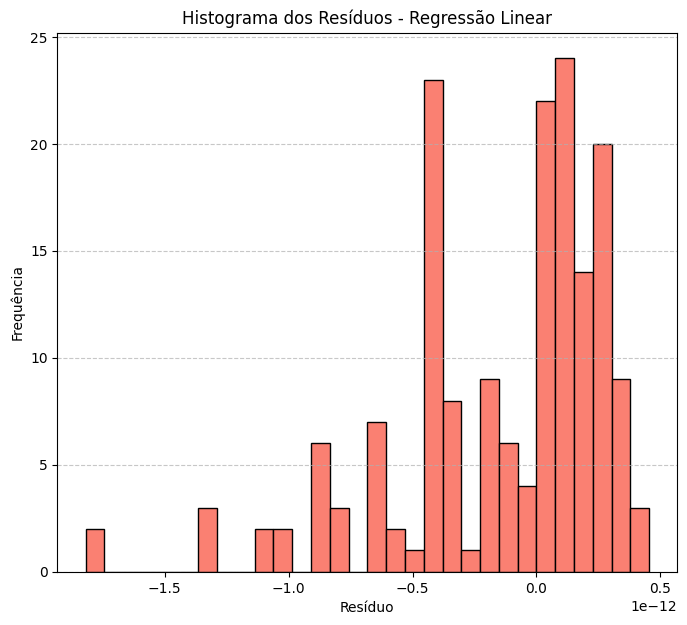

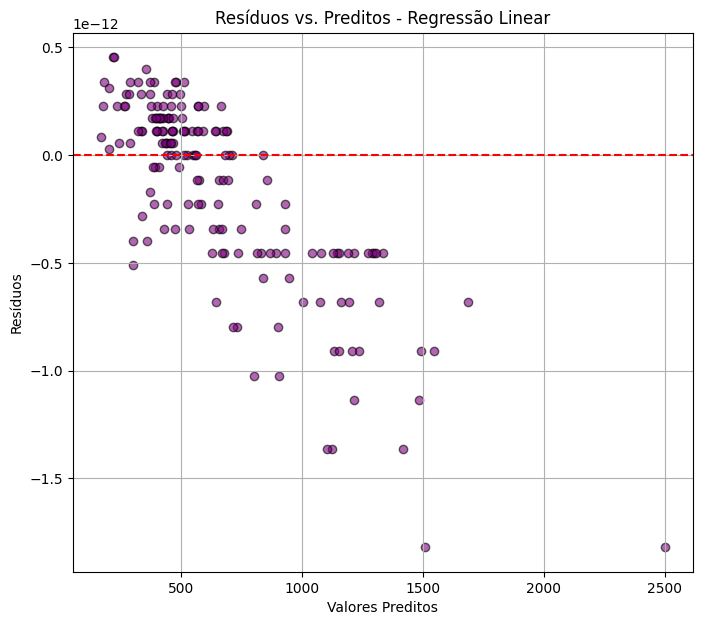

In [794]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.3, random_state=BEST_SEED)

X_train_r = scaler.fit_transform(X_train_r)
X_test_r = scaler.transform(X_test_r)

lr = LinearRegression()
lr.fit(X_train_r, y_train_r)
y_pred_r = lr.predict(X_test_r)

r2 = r2_score(y_test_r, y_pred_r)
mse = mean_squared_error(y_test_r, y_pred_r)
rmse = root_mean_squared_error(y_test_r, y_pred_r)
mae = mean_absolute_error(y_test_r, y_pred_r)

print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Gráfico de Dispersão: Valores Reais vs. Preditos
plt.figure(figsize=(8, 7))
plt.scatter(y_test_r, y_pred_r, alpha=0.6, color='teal', edgecolor='k')
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], 'r--')
plt.xlabel('Valores Reais (y_test)')
plt.ylabel('Valores Preditos (y_pred)')
plt.title('Dispersão: Reais vs. Preditos - Regressão Linear')
plt.grid(True)
plt.show()

# Histograma dos Resíduos
residuals = y_test_r - y_pred_r

plt.figure(figsize=(8, 7))
plt.hist(residuals, bins=30, color='salmon', edgecolor='black')
plt.title('Histograma dos Resíduos - Regressão Linear')
plt.xlabel('Resíduo')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Gráficos de Resíduos vs. Valores Preditos
plt.figure(figsize=(8, 7))
plt.scatter(y_pred_r, residuals, alpha=0.6, color='purple', edgecolor='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Preditos - Regressão Linear')
plt.grid(True)
plt.show()

Ruído: 0.000 | R²: 1.0000 | MSE: 0.00 | RMSE: 0.00 | MAE: 0.00
Ruído: 0.010 | R²: 1.0000 | MSE: 3.97 | RMSE: 1.99 | MAE: 1.15
Ruído: 0.050 | R²: 0.9991 | MSE: 115.88 | RMSE: 10.76 | MAE: 7.18
Ruído: 0.100 | R²: 0.9961 | MSE: 505.66 | RMSE: 22.49 | MAE: 12.16
Ruído: 0.200 | R²: 0.9915 | MSE: 1114.62 | RMSE: 33.39 | MAE: 20.51
Ruído: 0.500 | R²: 0.9798 | MSE: 2641.88 | RMSE: 51.40 | MAE: 31.35

Melhor ruído: 0.000 com R²=1.0000, RMSE=0.00


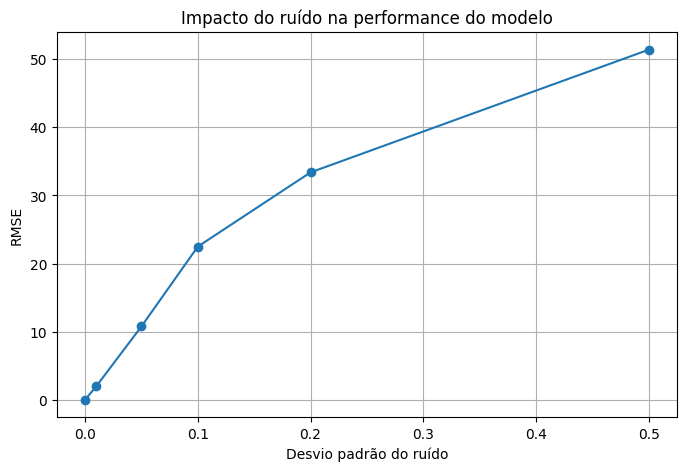

In [ ]:
noise_levels = [0, 0.01, 0.05, 0.1, 0.2, 0.5]
results = []

for noise_std in noise_levels:
    # Separação dos dados
    X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.3, random_state=BEST_SEED)
    
    scaler = StandardScaler()
    X_train_r = scaler.fit_transform(X_train_r)
    X_test_r = scaler.transform(X_test_r)
    
    # Adicionar ruído só no treino
    noise = np.random.normal(0, noise_std, X_train_r.shape)
    X_train_r_aug = X_train_r + noise
    
    # Treinar e prever
    lr_aug = LinearRegression()
    lr_aug.fit(X_train_r_aug, y_train_r)
    y_pred_r_aug = lr_aug.predict(X_test_r)
    
    # Métricas
    r2_aug = r2_score(y_test_r, y_pred_r_aug)
    mse_aug = mean_squared_error(y_test_r, y_pred_r_aug)
    rmse_aug = np.sqrt(mse_aug)
    mae_aug = mean_absolute_error(y_test_r, y_pred_r_aug)
    
    results.append((noise_std, r2_aug, mse_aug, rmse_aug, mae_aug))
    print(f"Ruído: {noise_std:.3f} | R²: {r2_aug:.4f} | MSE: {mse_aug:.2f} | RMSE: {rmse_aug:.2f} | MAE: {mae_aug:.2f}")

# Escolher o melhor ruído baseado no maior R²
# Se houver empate no R², escolhe o menor ruído > 0 com o menor RMSE
max_r2 = max(r[1] for r in results)

# Filtra todos com R² máximo
candidatos = [r for r in results if r[1] == max_r2]

# Se houver mais de um candidato, escolher o de ruído > 0 com menor RMSE
if len(candidatos) > 1:
    # Remove ruído zero se outros empataram com ele
    candidatos_sem_zero = [r for r in candidatos if r[0] > 0]
    if candidatos_sem_zero:
        best = min(candidatos_sem_zero, key=lambda x: x[3])  # menor RMSE
    else:
        best = candidatos[0]  # todos têm ruído 0
else:
    best = candidatos[0]

print(f"\nMelhor ruído: {best[0]:.3f} com R²={best[1]:.4f}, RMSE={best[3]:.2f}")

# Plotar impacto do ruído no RMSE
noise_vals = [r[0] for r in results]
rmse_vals = [r[3] for r in results]

plt.figure(figsize=(8,5))
plt.plot(noise_vals, rmse_vals, marker='o')
plt.xlabel('Desvio padrão do ruído')
plt.ylabel('RMSE')
plt.title('Impacto do ruído na performance do modelo')
plt.grid(True)
plt.show()

R²: 1.0000
MSE: 0.5780
RMSE: 0.7603
MAE: 0.4674


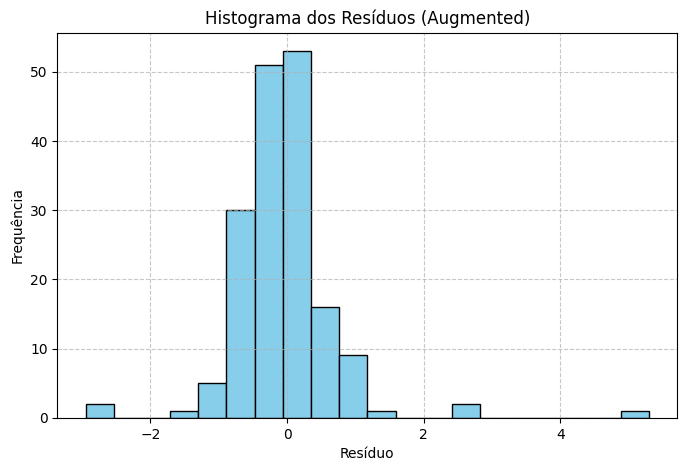

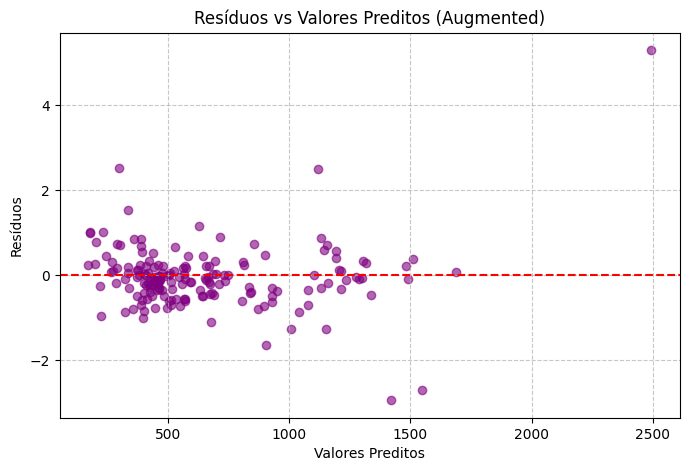

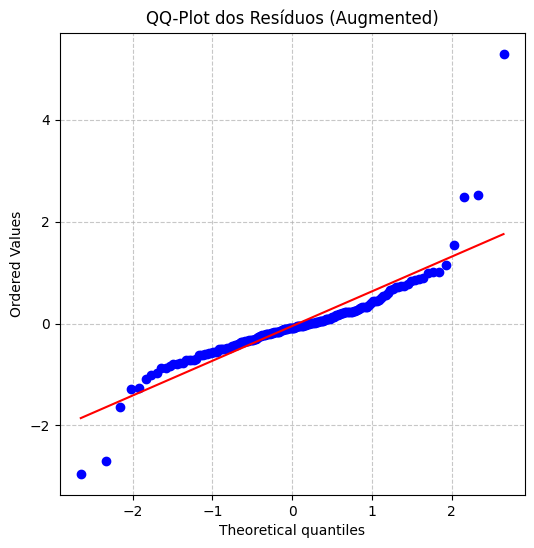

In [796]:
# Testando o segundo melhor noise (0.01)
# R² = 1 significa que o modelo explicou 100% da variação dos dados — ou seja,
# as previsões do modelo estão perfeitamente alinhadas com os valores reais. 
# Em outras palavras, o modelo ajustou perfeitamente os dados de teste.
BEST_NOISE_R = 0.01

# Separação treino/teste
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.3, random_state=BEST_SEED)

# Normalização
scaler = StandardScaler()
X_train_r = scaler.fit_transform(X_train_r)
X_test_r = scaler.transform(X_test_r)

# --- Data Augmentation: adicionar ruído ao treino ---
noise = np.random.normal(0, BEST_NOISE_R, X_train_r.shape) 
X_train_r_aug = X_train_r + noise
y_train_r_aug = y_train_r.copy()  # mantemos os mesmos targets para o augmented

# Concatenar os dados originais e os aumentados
X_train_total = np.vstack([X_train_r, X_train_r_aug])
y_train_total = np.concatenate([y_train_r, y_train_r_aug])

# Treinar regressão linear com dados aumentados
lr_aug = LinearRegression()
lr_aug.fit(X_train_total, y_train_total)
y_pred_r_aug = lr_aug.predict(X_test_r)

# Métricas
r2_aug = r2_score(y_test_r, y_pred_r_aug)
mse_aug = mean_squared_error(y_test_r, y_pred_r_aug)
rmse_aug = root_mean_squared_error(y_test_r, y_pred_r_aug)
mae_aug = mean_absolute_error(y_test_r, y_pred_r_aug)

print(f"R²: {r2_aug:.4f}")
print(f"MSE: {mse_aug:.4f}")
print(f"RMSE: {rmse_aug:.4f}")
print(f"MAE: {mae_aug:.4f}")

# Resíduos
residuos_aug = y_test_r - y_pred_r_aug

# 1. Histograma dos resíduos
plt.figure(figsize=(8,5))
plt.hist(residuos_aug, bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma dos Resíduos (Augmented)')
plt.xlabel('Resíduo')
plt.ylabel('Frequência')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 2. Resíduos vs valores previstos
plt.figure(figsize=(8,5))
plt.scatter(y_pred_r_aug, residuos_aug, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Resíduos vs Valores Preditos (Augmented)')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 3. QQ-plot para verificar normalidade dos resíduos
plt.figure(figsize=(6,6))
stats.probplot(residuos_aug, dist="norm", plot=plt)
plt.title('QQ-Plot dos Resíduos (Augmented)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()